In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [39]:
NoN = 2 # Number output of NN

class NN(tf.keras.Model):
    def __init__(self):
        super(NN, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units = 64, activation='tanh')
        self.hidden_layer_2 = tf.keras.layers.Dense(units = 64, activation='tanh')
        self.hidden_layer_3 = tf.keras.layers.Dense(units = 64, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(NoN, activation=None)  
        
    def call(self, x):
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_3(x)
        return self.output_layer(x)

    
def func(x, model):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        u = model(x)
        u_1,u_2 = u[:,0:1],u[:,1:2]
        
        du_1 = tape.gradient(u_1, x)
        du_2 = tape.gradient(u_2, x)
    
    f1 = du_1 - (u_1 - u_1*u_2)
    f2 = du_2 - (u_1*u_2 - u_2)
    return f1, f2


# loss function
def loss_fn(t,model):
    f1, f2 = func(t,model)    
    loss1 = tf.reduce_mean(tf.square(f1)) 
    loss2 = tf.reduce_mean(tf.square(f2)) 
    total_loss = loss1 + loss2
    return total_loss


#loss function condition
def loss_fn_con(model):
    u_pred = model(tf.convert_to_tensor(t_init, dtype=tf.float32))
    return tf.reduce_mean(tf.square(u_pred - u_init))


# total loss function
def total_loss(t,model):
    return loss_fn(t,model) + loss_fn_con(model)
    


Epoch: 0, Loss: 2.40000581741333
Epoch: 1000, Loss: 0.0915272980928421
Epoch: 2000, Loss: 0.08684726804494858
Epoch: 3000, Loss: 0.08615133166313171
Epoch: 4000, Loss: 0.08571792393922806


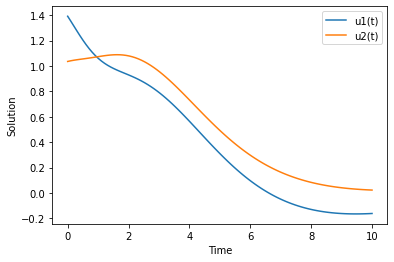

In [38]:
model = NN()   

# condition 
t_init = np.array([[0.0]]) # t_0
u_init = np.array([[1.5, 1.0]]) # u_1(0) & u_2(0)

t_data = np.linspace(0,10,100).reshape(-1,1)   
t_tensor = tf.convert_to_tensor(t_data, dtype=tf.float32) 

epochs = 5000    
for epoch in range(epochs):
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    with tf.GradientTape() as tape:
        loss = total_loss(t_tensor, model)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.numpy()}')

# Results
u_pred = model(t_tensor).numpy()
u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1]

# Plot results
plt.plot(t_data, u1_pred, label='u1(t)')
plt.plot(t_data, u2_pred, label='u2(t)')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

1024